# Data Preprocessing

Load Dataset

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Install kagglehub if not already installed:
# pip install "kagglehub[pandas-datasets]"

import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the exact file path inside the dataset
file_path = "StudentsPerformance.csv"

# Load the dataset using kagglehub
df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "spscientist/students-performance-in-exams",
    file_path
)

# Display the first 5 records
print("First 5 records:\n", df.head())


<ipython-input-1-0818c6dbb695>:14: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:
    gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


Handle missing values (if any).

In [2]:
#Check null values
null_count =df.isnull().sum()
null_count

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


Encode categorical variables using one-hot encoding or label encoding.

In [3]:
# Apply one-hot encoding to categorical columns because these columns have no inherent order or preference

categorical_columns = ['gender',
    'race/ethnicity',
    'parental level of education',
    'lunch',
    'test preparation course']

df_encoded = pd.get_dummies(df, categorical_columns, drop_first=True)  # drop_first to avoid multicollinearity

In [4]:
df_encoded

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,False,True,False,False,False,True,False,False,False,False,True,True
1,69,90,88,False,False,True,False,False,False,False,False,True,False,True,False
2,90,95,93,False,True,False,False,False,False,False,True,False,False,True,True
3,47,57,44,True,False,False,False,False,False,False,False,False,False,False,True
4,76,78,75,True,False,True,False,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,False,False,False,False,True,False,False,True,False,False,True,False
996,62,55,55,True,False,True,False,False,False,True,False,False,False,False,True
997,59,71,65,False,False,True,False,False,False,True,False,False,False,False,False
998,68,78,77,False,False,False,True,False,False,False,False,True,False,True,False


Normalize or standardize features (optional but recommended).

In [5]:
# We'll scale only numeric features excluding our target column 'math score' , casue we to preict it in it's original form
numeric_features = ['reading score', 'writing score']
scaler = StandardScaler()
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])


In [6]:
df_encoded

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,0.193999,0.391492,False,True,False,False,False,True,False,False,False,False,True,True
1,69,1.427476,1.313269,False,False,True,False,False,False,False,False,True,False,True,False
2,90,1.770109,1.642475,False,True,False,False,False,False,False,True,False,False,True,True
3,47,-0.833899,-1.583744,True,False,False,False,False,False,False,False,False,False,False,True
4,76,0.605158,0.457333,True,False,True,False,False,False,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,2.044215,1.774157,False,False,False,False,True,False,False,True,False,False,True,False
996,62,-0.970952,-0.859491,True,False,True,False,False,False,True,False,False,False,False,True
997,59,0.125472,-0.201079,False,False,True,False,False,False,True,False,False,False,False,False
998,68,0.605158,0.589015,False,False,False,True,False,False,False,False,True,False,True,False


# Feature Engineering

Choose relevant features to predict math score.

In [7]:
# All columns except 'math score'
X = df_encoded.drop('math score', axis=1)
# Target variable to predict
y = df_encoded['math score']


In [8]:
X.head()

,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,0.193999,0.391492,False,True,False,False,False,True,False,False,False,False,True,True
1,1.427476,1.313269,False,False,True,False,False,False,False,False,True,False,True,False
2,1.770109,1.642475,False,True,False,False,False,False,False,True,False,False,True,True
3,-0.833899,-1.583744,True,False,False,False,False,False,False,False,False,False,False,True
4,0.605158,0.457333,True,False,True,False,False,False,False,False,True,False,True,True


In [9]:
y.head()

,math score
0,72
1,69
2,90
3,47
4,76


Create interaction or polynomial features (only for Polynomial Regression part).

In [10]:
from sklearn.preprocessing import PolynomialFeatures

# Use PolynomialFeatures for degree 2
poly2 = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly2.fit_transform(X)

# Optional: view feature names
feature_names = poly2.get_feature_names_out(X.columns)
X_poly_df = pd.DataFrame(X_poly, columns=feature_names)


# Model Building

Split the data into training and test sets (80/20).

In [11]:
from sklearn.model_selection import train_test_split

# For Multilinear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# For Polynomial Regression
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly_df, y, test_size=0.2, random_state=42)


Train two models:

■ Multilinear Regression

In [12]:
from sklearn.linear_model import LinearRegression

# Multilinear Regression
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)
mlr_pred = mlr_model.predict(X_test)

■ Polynomial Regression (degree 2 or 3)

In [13]:
# Polynomial Regression
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_poly_train)
poly_pred = poly_model.predict(X_poly_test)

# Model Evaluation

Use metrics: RMSE, MAE, and R² score.

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Multilinear
mlr_rmse = np.sqrt(mean_squared_error(y_test, mlr_pred))
mlr_mae = mean_absolute_error(y_test, mlr_pred)
mlr_r2 = r2_score(y_test, mlr_pred)

# Polynomial
poly_rmse = np.sqrt(mean_squared_error(y_poly_test, poly_pred))
poly_mae = mean_absolute_error(y_poly_test, poly_pred)
poly_r2 = r2_score(y_poly_test, poly_pred)

# Print scores
print("Multilinear Regression:")
print(f"  RMSE: {mlr_rmse:.2f}")
print(f"  MAE: {mlr_mae:.2f}")
print(f"  R²: {mlr_r2:.2f}\n")

print("Polynomial Regression:")
print(f"  RMSE: {poly_rmse:.2f}")
print(f"  MAE: {poly_mae:.2f}")
print(f"  R²: {poly_r2:.2f}")


Multilinear Regression:
  RMSE: 5.39
  MAE: 4.21
  R²: 0.88

Polynomial Regression:
  RMSE: 5.73
  MAE: 4.54
  R²: 0.87


Visualize predicted vs actual values.

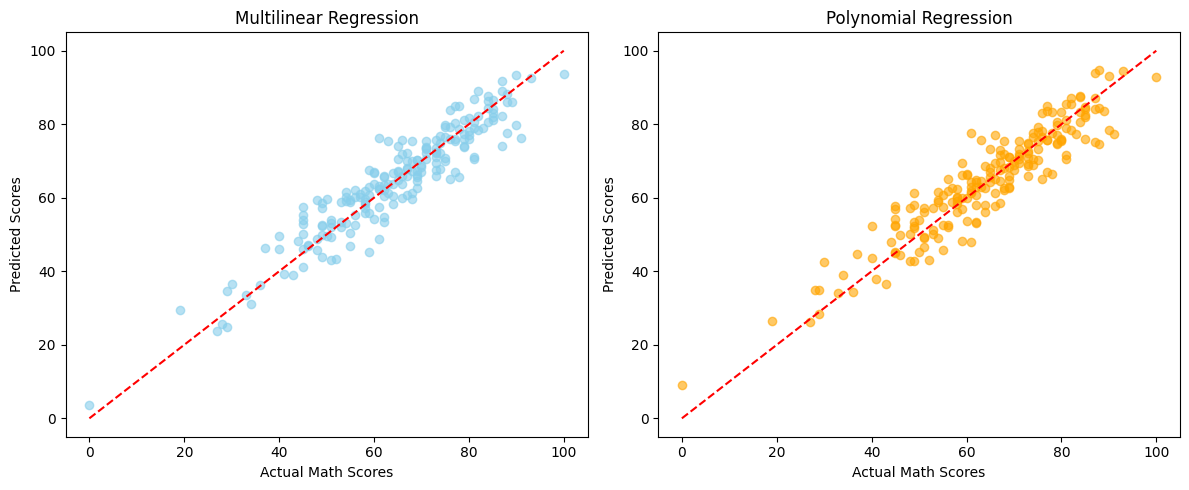

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Multilinear Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, mlr_pred, alpha=0.6, color='skyblue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Multilinear Regression')
plt.xlabel('Actual Math Scores')
plt.ylabel('Predicted Scores')

# Polynomial Plot
plt.subplot(1, 2, 2)
plt.scatter(y_poly_test, poly_pred, alpha=0.6, color='orange')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Polynomial Regression')
plt.xlabel('Actual Math Scores')
plt.ylabel('Predicted Scores')

plt.tight_layout()
plt.show()


Discuss overfitting or underfitting in Polynomial Regression.

In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Multilinear predictions
mlr_train_pred = mlr_model.predict(X_train)
mlr_test_pred = mlr_model.predict(X_test)

# Polynomial predictions
poly_train_pred = poly_model.predict(X_poly_train)
poly_test_pred = poly_model.predict(X_poly_test)

# Multilinear Metrics
mlr_r2_train = r2_score(y_train, mlr_train_pred)
mlr_r2_test = r2_score(y_test, mlr_test_pred)

# Polynomial Metrics
poly_r2_train = r2_score(y_train, poly_train_pred)
poly_r2_test = r2_score(y_test, poly_test_pred)

# Display R² for both
print(f"Multilinear Regression R² (Train): {mlr_r2_train:.2f}")
print(f"Multilinear Regression R² (Test) : {mlr_r2_test:.2f}")
print(f"Polynomial Regression R² (Train): {poly_r2_train:.2f}")
print(f"Polynomial Regression R² (Test) : {poly_r2_test:.2f}")


Multilinear Regression R² (Train): 0.87
Multilinear Regression R² (Test) : 0.88
Polynomial Regression R² (Train): 0.89
Polynomial Regression R² (Test) : 0.87


Multilinear Regression showed strong and consistent performance with an R² of 0.88 on the test set and 0.87 on the training set, both test and train R2 are high which indicates good generalization or good fit.

Polynomial Regression (degree 2) achieved a slightly higher training R² of 0.89, but a slightly lower test R² of 0.87. This suggests mild overfitting — the model fits the training data slightly better but does not significantly improve test performance.

Overall, Multilinear Regression remains the preferred model due to its simplicity and stability.
